# Linear Regression

## Usuful materials
Ch. 3 of Bishop, 2006 [[PDF]](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)

## Supervised learning
Say that you observe $n$, $d$-dimensional, *inputs*:
$$
\mathbf{x}_{1:n} = \{\mathbf{x}_1,\dots,\mathbf{x}_n\},
$$
and *outputs*:
$$
\mathbf{y}_{1:n} = \{y_1,\dots,y_n\}.
$$
The regression problem consits of using the data $\mathbf{x}_{1:n}$ and $\mathbf{y}_{1:n}$ to find
the map that connects the inputs to the outputs.

We will be playing with the following dataset.
Namely, it records the observed building floor area ($\mathrm{ft}^2$) and yearly electricity consumption ($\mathrm{kBTU}$).<br>
Let's look at the data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

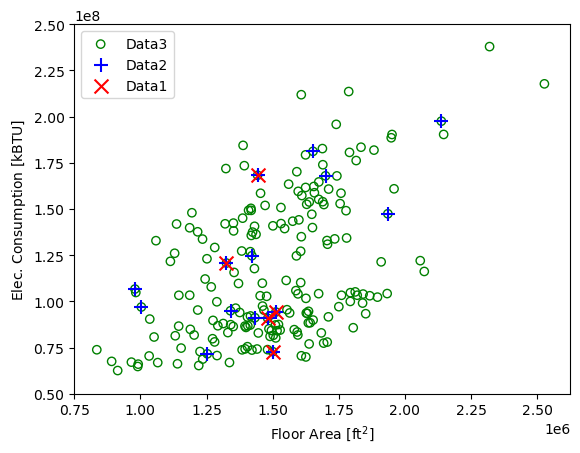

In [2]:
np.random.seed(1234) # for reproducibility
# import dataset
Data3 = pd.read_excel(os.path.join(os.path.dirname('__file__'), '..', 'data', 'Data.xlsx')) # import data

# Data1: subset of Data3
idx_Data1 = np.random.randint(low=0,high=Data3.shape[0],size=5)
Data1 = Data3.loc[idx_Data1,:]

# Data2: subset of Data1
idx_Data2 = np.hstack((idx_Data1, np.random.randint(low=0,high=Data3.shape[0],size=10)))
Data2 = Data3.loc[idx_Data2,:]

# scatter plots
plt.scatter(Data3['Area [sq ft]'], Data3['Elec [kBTU]'], facecolors='None', edgecolors='green', label='Data3')
plt.scatter(Data2['Area [sq ft]'], Data2['Elec [kBTU]'], marker='+', c='blue', s=100, label='Data2')
plt.scatter(Data1['Area [sq ft]'], Data1['Elec [kBTU]'], marker='x', c='red', s=100, label='Data1')
plt.xlabel('Floor Area [$\mathrm{ft}^2$]')
plt.ylabel('Elec. Consumption [$\mathrm{kBTU}$]')
plt.ylim(0.5e+8, 2.5e+8)
plt.xlim(0.75e+6, 2.625e+6)
plt.legend()
plt.show()

Q. Develop linear regression models for ***Data1***, ***Data2***, and ***Data3*** with 'scikit learn' (Least-square) and 'PyMC' (Bayesian). Visualize the models. Think about (i) the goodness of the models; (ii) differences between the models.

### Regression model
+ Any model that connects $\mathbf{x}$ to $y$ through the use of some parameters.
+ Linear regression:
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D},
$$

where $\mathbf{w} = (w_{1}, ... , w_{D})^{T}$ .

Let's preprocess data before developing models. You can use preprocess tools in ***scikit learn*** package (e.g., StandardScaler).<br>
This standard scaler standardizes features by removing the mean and scaling to unit variance.<br>
The standard score of a sample $x$ is calculated as:
$$ z = \frac{(x - u)}{s},$$
where $u$ is the mean of the training samples, and $s$ is the standard deviation of the training samples.<br>

By the way, [***scikit learn***](https://scikit-learn.org/stable/) is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

In [3]:
from sklearn import preprocessing

In [4]:
# Sub-dataset
X1 = Data1['Area [sq ft]'].values[:,None]
Y1 = Data1['Elec [kBTU]'].values[:,None]
Scale_X1 = preprocessing.StandardScaler() # StandardScaler for X1
X1_scaled = Scale_X1.fit_transform(X1) # fit the StandardScaler and transform X1
Scale_Y1 = preprocessing.StandardScaler() # StandardScaler for Y1
Y1_scaled = Scale_Y1.fit_transform(Y1) # fit the StandardScaler and transform Y1

# Data 2
X2 = Data2['Area [sq ft]'].values[:,None]
Y2 = Data2['Elec [kBTU]'].values[:,None]
Scale_X2 = preprocessing.StandardScaler() # StandardScaler for X2
X2_scaled = Scale_X2.fit_transform(X2) # fit the StandardScaler and transform X2
Scale_Y2 = preprocessing.StandardScaler() # StandardScaler for Y2
Y2_scaled = Scale_Y2.fit_transform(Y2) # fit the StandardScaler and transform Y2

# Dataset
X3 = Data3['Area [sq ft]'].values[:,None]
Y3 = Data3['Elec [kBTU]'].values[:,None]
Scale_X3 = preprocessing.StandardScaler() # StandardScaler for X3
X3_scaled = Scale_X3.fit_transform(X3) # fit the StandardScaler and transform X3
Scale_Y3 = preprocessing.StandardScaler() # StandardScaler for Y3
Y3_scaled = Scale_Y3.fit_transform(Y3) # fit the StandardScaler and transform Y3

# points to visualize the models
X_plot = np.linspace(X3.min(), X3.max(),100)[:,None]
X1_plot_scaled = Scale_X1.transform(X_plot)
X2_plot_scaled = Scale_X2.transform(X_plot)
X3_plot_scaled = Scale_X3.transform(X_plot)

## 1. Least-square solution

+ First published by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.
+ The idea is to find the best $\mathbf{w}$ by minimizing a quadratic loss function:
$$
\mathcal{L}(\mathbf{w})\equiv\mathcal{L}(\mathbf{w};\mathbf{x}_{1:n},\mathbf{y}_{1:n}) = \sum_{i=1}^n\left[y(\mathbf{x}_i;\mathbf{w}) - y_i\right]^2,
$$
where
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}.
$$

In our case, we have only two features as
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1}.
$$

So, we want to estimate
$$
\mathbf{w}_{\mbox{LS}} = \arg\min_\mathbf{w}\mathcal{L}(\mathbf{w}).
$$

We use ***linear_model*** in ***scikit learn*** package to train linear models

In [5]:
from sklearn import linear_model

### Linear regression models

In [6]:
# train a linear regression model
Linear1_MLE = linear_model.LinearRegression()
Linear1_MLE.fit(X=X1_scaled,y=Y1_scaled) # train
Y1_plot_scaled = Linear1_MLE.predict(X1_plot_scaled) # predict
Y1_plot = Scale_Y1.inverse_transform(Y1_plot_scaled) # inverse transform

In [7]:
# train a linear regression model
Linear2_MLE = linear_model.LinearRegression()
Linear2_MLE.fit(X=X2_scaled,y=Y2_scaled) # train
Y2_plot_scaled = Linear2_MLE.predict(X2_plot_scaled) # predict
Y2_plot = Scale_Y2.inverse_transform(Y2_plot_scaled) # inverse transform

In [8]:
# train a linear regression model
Linear3_MLE = linear_model.LinearRegression()
Linear3_MLE.fit(X=X3_scaled,y=Y3_scaled) # train
Y3_plot_scaled = Linear3_MLE.predict(X3_plot_scaled) # predict
Y3_plot = Scale_Y3.inverse_transform(Y3_plot_scaled) # inverse transform

### Visualization

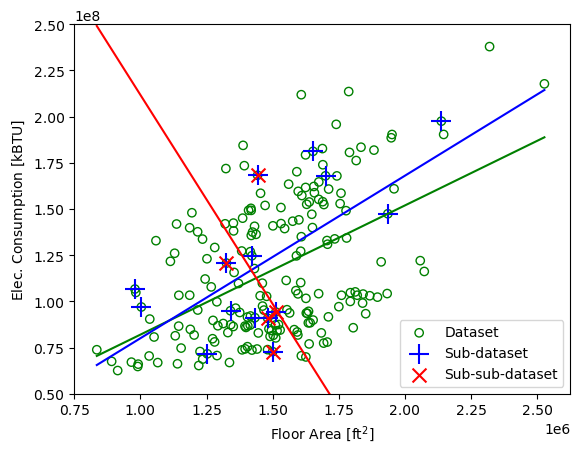

In [9]:
# visualization
plt.scatter(Data3['Area [sq ft]'], Data3['Elec [kBTU]'], facecolors='None', edgecolors='green', label='Dataset')
plt.scatter(Data2['Area [sq ft]'], Data2['Elec [kBTU]'], marker='+', c='b', s=200, label='Sub-dataset')
plt.scatter(Data1['Area [sq ft]'], Data1['Elec [kBTU]'], marker='x', c='r', s=100, label='Sub-sub-dataset')

plt.xlabel('Floor Area [$\mathrm{ft}^2$]')
plt.ylabel('Elec. Consumption [$\mathrm{kBTU}$]')
plt.plot(X_plot, Y3_plot, 'g')
plt.plot(X_plot, Y2_plot, 'b')
plt.plot(X_plot, Y1_plot, 'r')
plt.ylim(0.5e+8,2.5e+8)
plt.xlim(0.75e+6, 2.625e+6)
plt.legend()
plt.show()

## 2. Maximum Likelihood solution
+ We *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

### Interpretation
+ $p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w})$ tells us:

> How plausible is it to observe $\mathbf{y}_{1:n}$ at inputs $\mathbf{x}_{1:n}$, if we know that the model parameters are $\mathbf{w}$?

### Properties of the Likelihood
If the measurements are independent, then (probability theory):
$$
p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) = \prod_{i=1}^np(y_i|\mathbf{x}_i, \mathbf{w}),
$$
where $p(y_i|\mathbf{x}_i,\mathbf{w})$ is the likelihood of a single measurement.

### The Gaussian Likelihood
+ We assign:
$$
p(y_i|\mathbf{x}_i, \mathbf{w}, \sigma) = \mathcal{N}\left(y_i| y(\mathbf{x}_i;\mathbf{w}), \sigma^2\right)
$$
where $\sigma$ models the **noise**. We assume $\sigma=1$ in this example.
+ We say:

> We beleive that our measurement is around the model prediction $y(\mathbf{x}_i;\mathbf{w})$
but it is contaminated with Gaussian noice of variance $\sigma^2$.

+ Once we have a likelihood, we can train the model by maximizing the likelihood:
$$
\mathbf{w}_{\mbox{MLE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma).
$$
+ And we find that:
$$
\mathbf{w}_{\mbox{MLE}} \equiv \mathbf{w}_{\mbox{LS}}.
$$

## 3. Bayesian solution

+ We *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

+ We *model the uncertainty in the model parameters* using a **prior**:
$$
\mathbf{w} \sim p(\mathbf{w}).
$$

### Gaussian Prior on the Weights
+ Consider the following **prior** on $\mathbf{w}$:
$$
p(\mathbf{w}|\alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I}\right).
$$
+ We say:

> Before we see the data, we beleive that $\mathbf{w}$ must be around zero with a precision of $\alpha=1/100$.

### The Posterior of the Weights
+ Combining the likelihood and the prior, we get using Bayes rule:
$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
\frac{p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'}.
$$
+ We say
> The posterior summarizes our state of knowledge about $\mathbf{w}$ after we see the data,
if we know $\alpha$ and $\sigma$.

We use PyMC to train Bayesian linear regression models. [***PyMC***](https://www.pymc.io/welcome.html) is a probabilistic programming package for Python that allows users to fit Bayesian models using a variety of numerical methods, most notably Markov chain Monte Carlo (MCMC) and variational inference (VI).

In [10]:
import pymc as pm

Let's train our first model with Data1

Sequential sampling (1 chains in 1 job)
Metropolis: [w]


Sampling 1 chain for 100_000 tune and 100_000 draw iterations (100_000 + 100_000 draws total) took 30 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


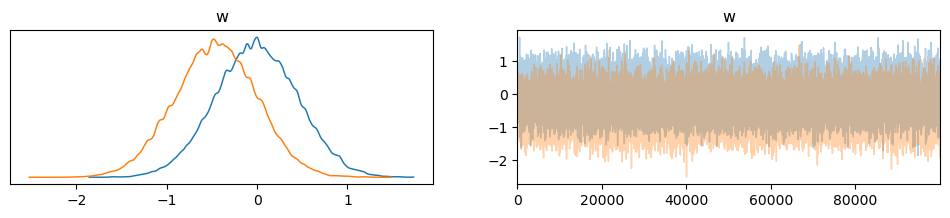

In [11]:
with pm.Model() as model:
    w = pm.Normal('w', mu=0., sigma =10 , shape=2)
    mu = w[0] + X1_scaled*w[1]
    likelihood = pm.Normal("y", mu = mu, sigma = 1, observed = Y1_scaled)
    
with model:
    step = pm.Metropolis()
    samples = pm.sample(draws=100000, tune=100000, step=step, chains=1, cores=1)
    pm.plot_trace(samples)

Let's visualize it

In [19]:
w_infered = samples.posterior['w'][0,::100,:].to_numpy()
y_samples = w_infered[:,0:1]+w_infered[:,1:]*X1_plot_scaled.T
y_med = np.median(y_samples, axis = 0)
y_u = np.percentile(y_samples, axis = 0, q = 97.5)
y_l = np.percentile(y_samples, axis = 0, q = 2.5)
Y1_med_scaled, Y1_u_scaled, Y1_l_scaled = [Scale_Y1.inverse_transform(y[:,None]) for y in [y_med, y_u, y_l]]

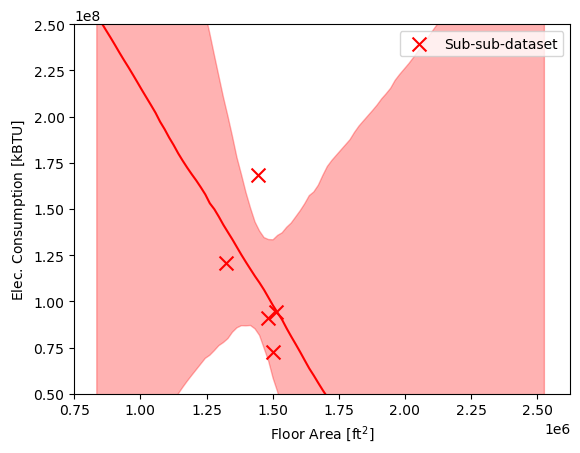

In [13]:
# visualization
plt.scatter(Data1['Area [sq ft]'], Data1['Elec [kBTU]'], marker='x', c='r', s=100, label='Sub-sub-dataset')
plt.xlabel('Floor Area [$\mathrm{ft}^2$]')
plt.ylabel('Elec. Consumption [$\mathrm{kBTU}$]')

plt.plot(X_plot, Y1_med_scaled.flatten(), 'r')
plt.fill_between(X_plot.flatten(), Y1_l_scaled.flatten(), Y1_u_scaled.flatten(), alpha=0.3, color='r')

plt.ylim(0.5e+8,2.5e+8)
plt.xlim(0.75e+6, 2.625e+6)
plt.legend()
plt.show()

Let's train the other two models

Sequential sampling (1 chains in 1 job)
Metropolis: [w]


Sampling 1 chain for 100_000 tune and 100_000 draw iterations (100_000 + 100_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


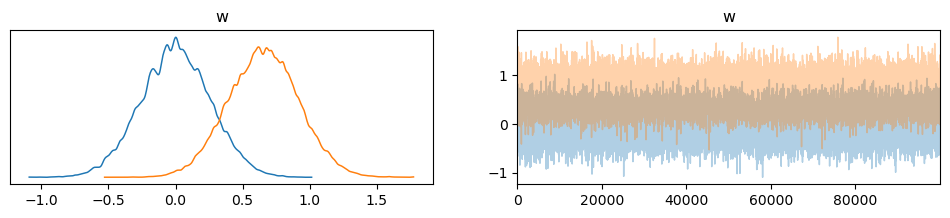

In [14]:
with pm.Model() as model2:
    w = pm.Normal('w', mu=0., sigma =10 , shape=2)
    mu = w[0] + X2_scaled*w[1]
    likelihood = pm.Normal("y", mu = mu, sigma = 1, observed = Y2_scaled)
    
with model2:
    step = pm.Metropolis()
    samples2 = pm.sample(draws=100000, tune=100000, step=step, chains=1, cores=1)
    pm.plot_trace(samples2)
    

In [20]:
w2_infered = samples2.posterior['w'][0,::100,:].to_numpy()
y2_samples = w2_infered[:,0:1]+w2_infered[:,1:]*X2_plot_scaled.T
y2_med = np.median(y2_samples, axis = 0)
y2_u = np.percentile(y2_samples, axis = 0, q = 97.5)
y2_l = np.percentile(y2_samples, axis = 0, q = 2.5)
Y2_med_scaled, Y2_u_scaled, Y2_l_scaled = [Scale_Y2.inverse_transform(y[:,None]) for y in [y2_med, y2_u, y2_l]]

Sequential sampling (1 chains in 1 job)
Metropolis: [w]


Sampling 1 chain for 100_000 tune and 100_000 draw iterations (100_000 + 100_000 draws total) took 29 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


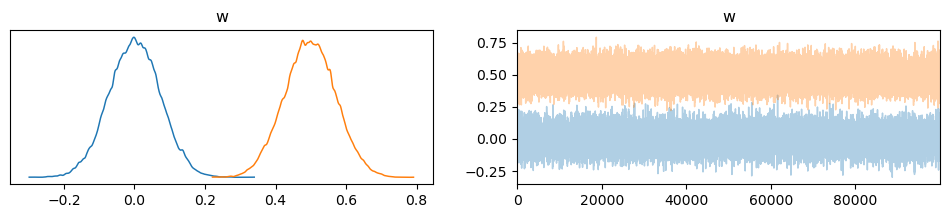

In [16]:
with pm.Model() as model3:
    w = pm.Normal('w', mu=0., sigma =10 , shape=2)
    mu = w[0] + X3_scaled*w[1]
    likelihood = pm.Normal("y", mu = mu, sigma = 1, observed = Y3_scaled)
    
with model3:
    step = pm.Metropolis()
    samples3 = pm.sample(draws=100000, tune=100000, step=step, chains=1, cores=1)
    pm.plot_trace(samples3)

In [21]:
w3_infered = samples3.posterior['w'][0,::100,:].to_numpy()
y3_samples = w3_infered[:,0:1]+w3_infered[:,1:]*X3_plot_scaled.T
y3_med = np.median(y3_samples, axis = 0)
y3_u = np.percentile(y3_samples, axis = 0, q = 97.5)
y3_l = np.percentile(y3_samples, axis = 0, q = 2.5)
Y3_med_scaled, Y3_u_scaled, Y3_l_scaled = [Scale_Y3.inverse_transform(y[:,None]) for y in [y3_med, y3_u, y3_l]]

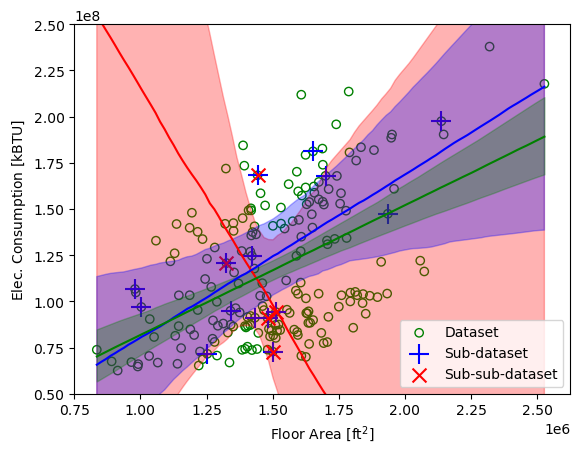

In [18]:
# visualization
plt.scatter(Data3['Area [sq ft]'], Data3['Elec [kBTU]'], facecolors='None', edgecolors='green', label='Dataset')
plt.scatter(Data2['Area [sq ft]'], Data2['Elec [kBTU]'], marker='+', c='b', s=200, label='Sub-dataset')
plt.scatter(Data1['Area [sq ft]'], Data1['Elec [kBTU]'], marker='x', c='r', s=100, label='Sub-sub-dataset')
plt.xlabel('Floor Area [$\mathrm{ft}^2$]')
plt.ylabel('Elec. Consumption [$\mathrm{kBTU}$]')

plt.plot(X_plot, Y1_med_scaled.flatten(), 'r')
plt.fill_between(X_plot.flatten(), Y1_l_scaled.flatten(), Y1_u_scaled.flatten(), alpha=0.3, color='r')
plt.plot(X_plot, Y2_med_scaled.flatten(), 'b')
plt.fill_between(X_plot.flatten(), Y2_l_scaled.flatten(), Y2_u_scaled.flatten(), alpha=0.3, color='b')
plt.plot(X_plot, Y3_med_scaled, 'g')
plt.fill_between(X_plot.flatten(), Y3_l_scaled.flatten(), Y3_u_scaled.flatten(), alpha=0.3, color='g')

plt.ylim(0.5e+8,2.5e+8)
plt.xlim(0.75e+6, 2.625e+6)
plt.legend()
plt.show()

Text(-2.5, 3, 'Posterior3')

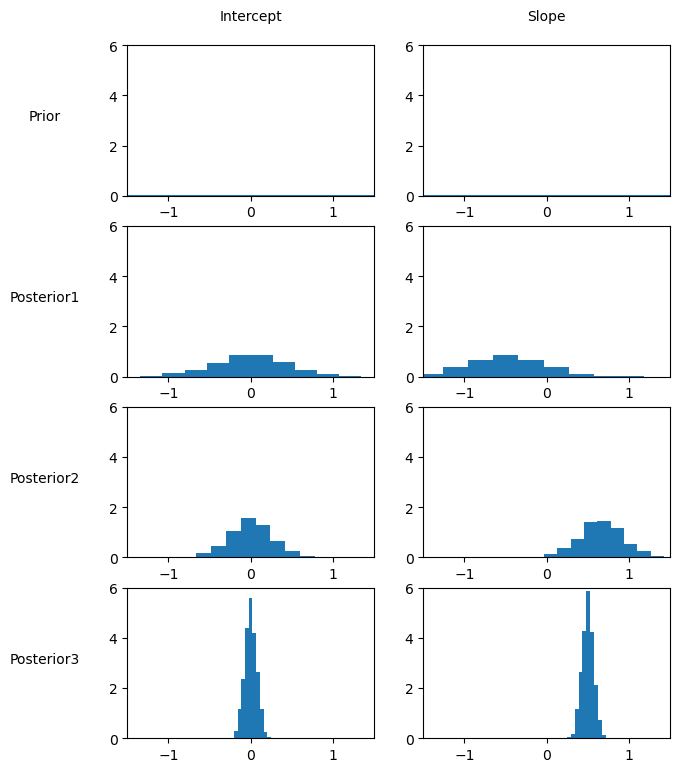

In [73]:
fig,ax = plt.subplots(4,2, figsize=(7,9))
ax[0,0].hist(np.random.randn(1000)*10, density=True)
ax[1,0].hist(w_infered[:,0], density=True)
ax[2,0].hist(w2_infered[:,0], density=True)
ax[3,0].hist(w3_infered[:,0],density=True)

ax[0,1].hist(np.random.randn(1000)*10, density=True)
ax[1,1].hist(w_infered[:,1], density=True)
ax[2,1].hist(w2_infered[:,1], density=True)
ax[3,1].hist(w3_infered[:,1],density=True)

for i in range(4):
    for j in range(2):
        ax[i,j].set_xlim(-1.5,1.5)
        ax[i,j].set_ylim(0,6)
        
ax[0,0].text(0,7,'Intercept',horizontalalignment='center')
ax[0,1].text(0,7,'Slope',horizontalalignment='center')
ax[0,0].text(-2.5,3,'Prior',horizontalalignment='center')
ax[1,0].text(-2.5,3,'Posterior1',horizontalalignment='center')
ax[2,0].text(-2.5,3,'Posterior2',horizontalalignment='center')
ax[3,0].text(-2.5,3,'Posterior3',horizontalalignment='center')